<a href="https://colab.research.google.com/github/Riza-sunesara/YoungDevInterns_Artificial_Intelligence_Tasks/blob/main/Basic_Tasks%20/Basic_Task02/Basic_Task02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Connecting to Github**

In [1]:
!git clone https://github.com/Riza-sunesara/YoungDevInterns_Artificial_Intelligence_Tasks.git
%cd YoungDevInterns_Artificial_Intelligence_Tasks/Basic_Tasks/Basic_Task02/

Cloning into 'YoungDevInterns_Artificial_Intelligence_Tasks'...
remote: Enumerating objects: 50, done.
remote: Counting objects: 100% (50/50), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 50 (delta 2), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (50/50), 21.96 MiB | 10.78 MiB/s, done.
Resolving deltas: 100% (2/2), done.
/content/YoungDevInterns_Artificial_Intelligence_Tasks/Basic_Tasks/Basic_Task02


# **Working on Task 02**

## **Using Dataset from sklearn**

In [2]:
# Libraries required for the task
import pandas as pd
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt

In [9]:
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['MedHouseVal'] = data.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [31]:
# Analyzing the dataset using Descriptive Statistics
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


Since "AveRooms" actually means: *Average number of rooms per household in a block group (i.e., neighborhood-level average).* Then there might be a limiting value as no block can contain 141 no. of rooms, hence considering 20 to be the limit. Similarly, for MedHouseVal, *most houses fall between 1 to 3, with a notable spike at 5*, likely due to value capping in the dataset. Hence, the value 5.0 is not a natural data point as it creates a spike.

In [25]:
# to remove these:

# Removing Outliers in AveRooms
df_filtered_rooms = df[df['AveRooms'] <= 20]
df_filtered_rooms.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [26]:
# Removing Capped/Spiked Value in MedHouseVal
df_filtered = df_filtered_rooms[df_filtered_rooms['MedHouseVal'] < 5.0]
df_filtered.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [27]:
# Calculating the mean, median, standard deviation of MedInc, HouseAge, AveRooms, MedHouseVal together using for

features=['MedInc','HouseAge','AveRooms','MedHouseVal']
for feature in features:
  print(f"Mean of {feature}: {df_filtered[feature].mean()}")
  print(f"Median of {feature}: {df_filtered[feature].median()}")
  print(f"Standard Deviation of {feature}: {df_filtered[feature].std()}")
  print()

Mean of MedInc: 3.6764738559754853
Median of MedInc: 3.4492
Standard Deviation of MedInc: 1.5687224154953678

Mean of HouseAge: 28.40949948927477
Median of HouseAge: 28.0
Standard Deviation of HouseAge: 12.499186618605192

Mean of AveRooms: 5.269487871664264
Median of AveRooms: 5.180615139470136
Standard Deviation of AveRooms: 1.3741668786744148

Mean of MedHouseVal: 1.9214203248212465
Median of MedHouseVal: 1.738
Standard Deviation of MedHouseVal: 0.9714799209747115



In [28]:
# Descriptive Statistics
df_filtered.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,19580.000000,19580.000000,19580.000000,19580.000000,19580.000000,19580.000000,19580.000000,19580.000000,19580.00000
mean,3.676474,28.409499,5.269488,1.077781,1445.321195,3.098550,35.644850,-119.562664,1.92142
std,1.568722,12.499187,1.374167,0.200886,1143.950606,10.657251,2.147326,2.007096,0.97148
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.750000,32.540000,-124.350000,0.14999
25%,2.526600,18.000000,4.413233,1.005747,800.000000,2.448471,33.930000,-121.770000,1.16500
50%,3.449200,28.000000,5.180615,1.048256,1182.000000,2.840186,34.270000,-118.500000,1.73800
75%,4.583300,37.000000,5.961183,1.098504,1750.000000,3.307732,37.720000,-117.990000,2.48100
max,15.000100,52.000000,19.962121,6.500000,35682.000000,1243.333333,41.950000,-114.310000,4.99100


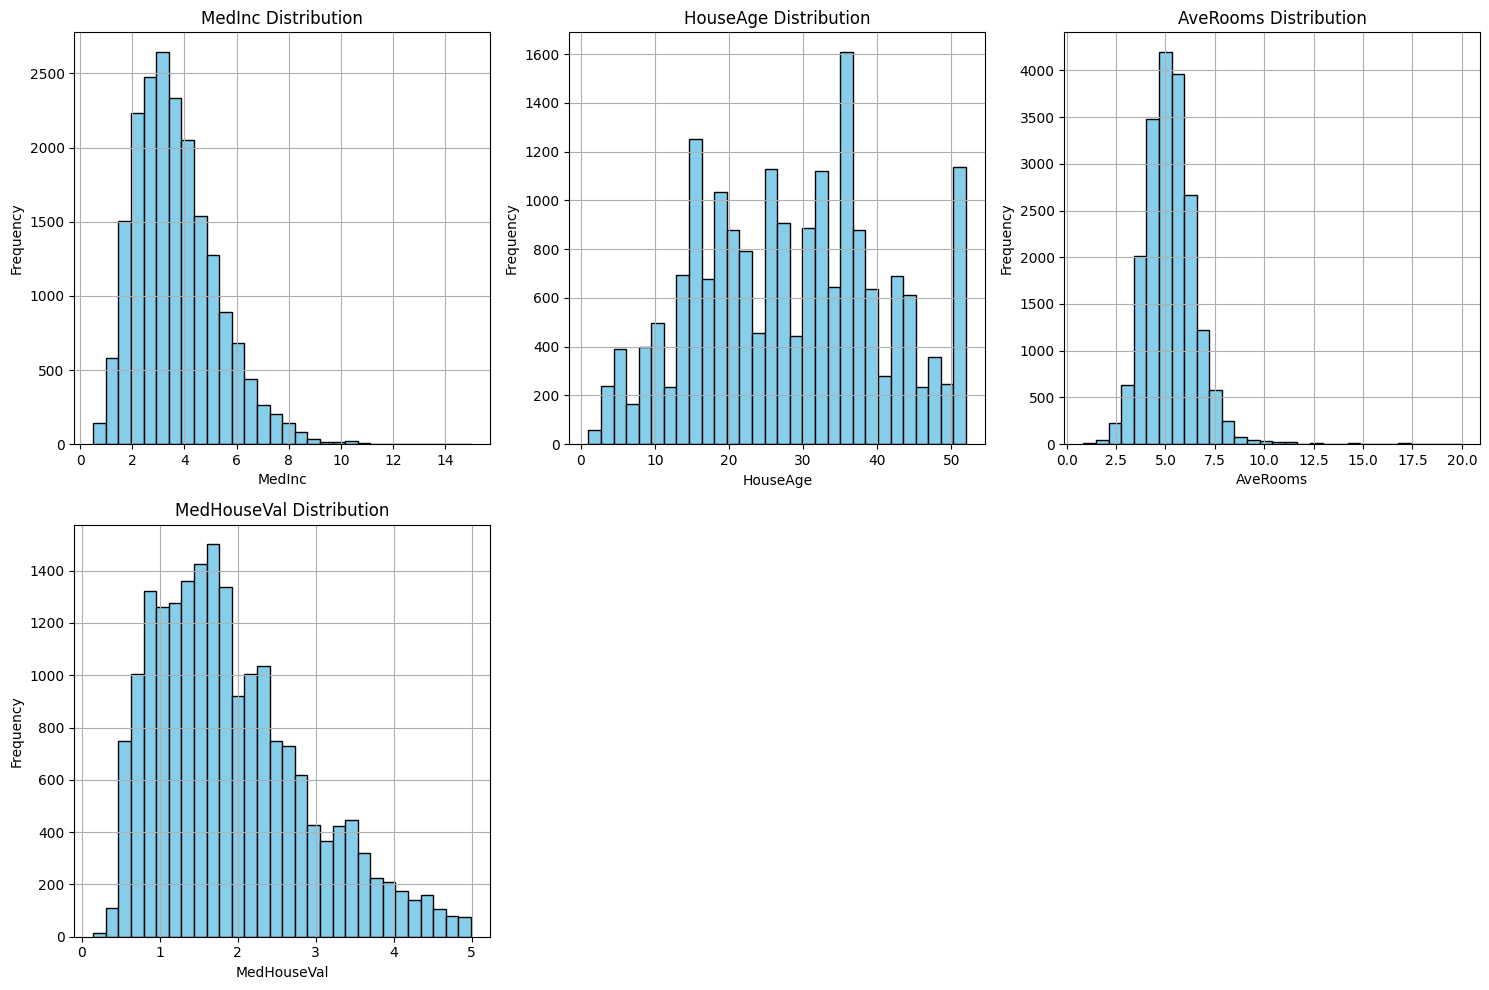

In [24]:
# Visualizing the data distributions with histograms
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(2, 3, i+1)
    df_filtered[feature].hist(bins=30, color='skyblue', edgecolor='black')
    plt.title(f'{feature} Distribution')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()